### Модели классификации  
#### Цель работы  
Познакомиться с основными приемами работы с моделями классификации в scikit-learn.  

#### Задания для выполнения  
Загрузите данные о диагностике сахарного диабета.  
Постройте модель классификации для предсказания наличия заболевания.  
Оцените качество построенной модели с помощью отчета о классификации и матрицы классификации.  
Постройте альтернативную полиномиальную модель, сравните ее с предыдущей.  

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
data = pd.read_csv("https://raw.githubusercontent.com/koroteevmv/ML_course/2023/ML2.2%20real%20classification/data/diabetes.csv")

In [4]:
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [6]:
data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [7]:
y = data.Outcome
X = data.drop(["Outcome"], axis=1)

In [8]:
y.shape, X.shape

((768,), (768, 8))

In [9]:
from sklearn.linear_model import LogisticRegression
logistic = LogisticRegression(max_iter=1000)

In [10]:
logistic.fit(X, y)

LogisticRegression(max_iter=1000)

In [11]:
print("Coefficients: \n", logistic.coef_[0])

Coefficients: 
 [ 1.22489896e-01  3.51098274e-02 -1.32996913e-02  7.81321442e-04
 -1.17372634e-03  8.96436740e-02  8.67718206e-01  1.49857949e-02]


In [12]:
_ = [print(k, v) for k, v in zip(X.columns, logistic.coef_[0])]

Pregnancies 0.12248989648964904
Glucose 0.035109827372578666
BloodPressure -0.013299691295303383
SkinThickness 0.0007813214423408886
Insulin -0.0011737263434965519
BMI 0.0896436740175574
DiabetesPedigreeFunction 0.8677182056259871
Age 0.014985794897767789


In [13]:
print("Intercept: \n", logistic.intercept_)

Intercept: 
 [-8.36473384]


In [14]:
y_pred = logistic.predict(X)

In [15]:
_ = [print(a, b) for a, b in list(zip(y, y_pred))[:10]]

1 1
0 0
1 1
0 0
1 1
0 0
1 0
0 1
1 1
1 0


In [16]:
from sklearn import metrics
metrics.confusion_matrix(y, y_pred)

array([[444,  56],
       [112, 156]], dtype=int64)

<Axes: >

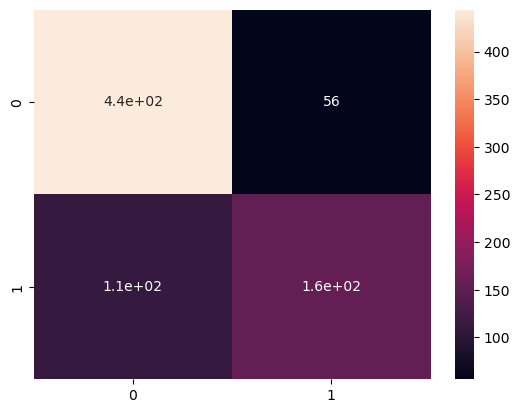

In [17]:
import seaborn as sns
sns.heatmap(metrics.confusion_matrix(y, y_pred), annot=True)

In [18]:
logistic.score(X, y)

0.78125

In [19]:
metrics.accuracy_score(y, y_pred)

0.78125

In [20]:
from sklearn.preprocessing import PolynomialFeatures

In [21]:
poly = PolynomialFeatures(2)

In [22]:
poly = poly.fit_transform(X)
poly

array([[1.00000e+00, 6.00000e+00, 1.48000e+02, ..., 3.93129e-01,
        3.13500e+01, 2.50000e+03],
       [1.00000e+00, 1.00000e+00, 8.50000e+01, ..., 1.23201e-01,
        1.08810e+01, 9.61000e+02],
       [1.00000e+00, 8.00000e+00, 1.83000e+02, ..., 4.51584e-01,
        2.15040e+01, 1.02400e+03],
       ...,
       [1.00000e+00, 5.00000e+00, 1.21000e+02, ..., 6.00250e-02,
        7.35000e+00, 9.00000e+02],
       [1.00000e+00, 1.00000e+00, 1.26000e+02, ..., 1.21801e-01,
        1.64030e+01, 2.20900e+03],
       [1.00000e+00, 1.00000e+00, 9.30000e+01, ..., 9.92250e-02,
        7.24500e+00, 5.29000e+02]])

In [25]:
polynomial = LogisticRegression(max_iter=1000)
polynomial.fit(poly, y)
y_pred_poly = polynomial.predict(poly)

c:\Users\Sofia\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [26]:
polynomial.score(poly, y)

0.79296875

Несмотря на то, что модель недоучилась, она всё же показала лучший результат